In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
import numpy as np

In [2]:
# Configuration
CSV_DIR = Path("/home/noh/pgc/experiments/csv")
config_label = "26-02-09"

# Define all versions to compare
versions = {
    "kd_tree": f"final_performance_report_kd_tree_{config_label}.csv",
    "angular": f"final_performance_report_angular_{config_label}.csv",
    "01_ring": f"final_performance_report_01_ring_{config_label}.csv",
    "02_xyz": f"final_performance_report_02_xyz_{config_label}.csv",
    "v2": f"final_performance_report_v2_{config_label}.csv",
}

# Load and process all dataframes
df_dict = {}
for version_name, csv_file in versions.items():
    csv_path = CSV_DIR / csv_file
    if csv_path.exists():
        df = pd.read_csv(csv_path)
        df_avg = (
            df.groupby(['scene'])
            .mean(numeric_only=True)
            .drop(columns=['frame'])
            .reset_index()
            .round(3)
        )
        df_dict[version_name] = df_avg
        print(f"✓ Loaded {version_name}: {len(df_avg)} scenes")
    else:
        print(f"✗ Not found: {csv_file}")

print(f"\nTotal versions loaded: {len(df_dict)}")

✓ Loaded kd_tree: 10 scenes
✓ Loaded angular: 10 scenes
✓ Loaded 01_ring: 10 scenes
✓ Loaded 02_xyz: 10 scenes
✓ Loaded v2: 10 scenes

Total versions loaded: 5


/tmp/ipykernel_946/429678996.py:27: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(scenes, rotation=45, ha='right')
/tmp/ipykernel_946/429678996.py:27: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(scenes, rotation=45, ha='right')
/tmp/ipykernel_946/429678996.py:27: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(scenes, rotation=45, ha='right')
/tmp/ipykernel_946/429678996.py:27: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(scenes, rotation=45, ha='right')


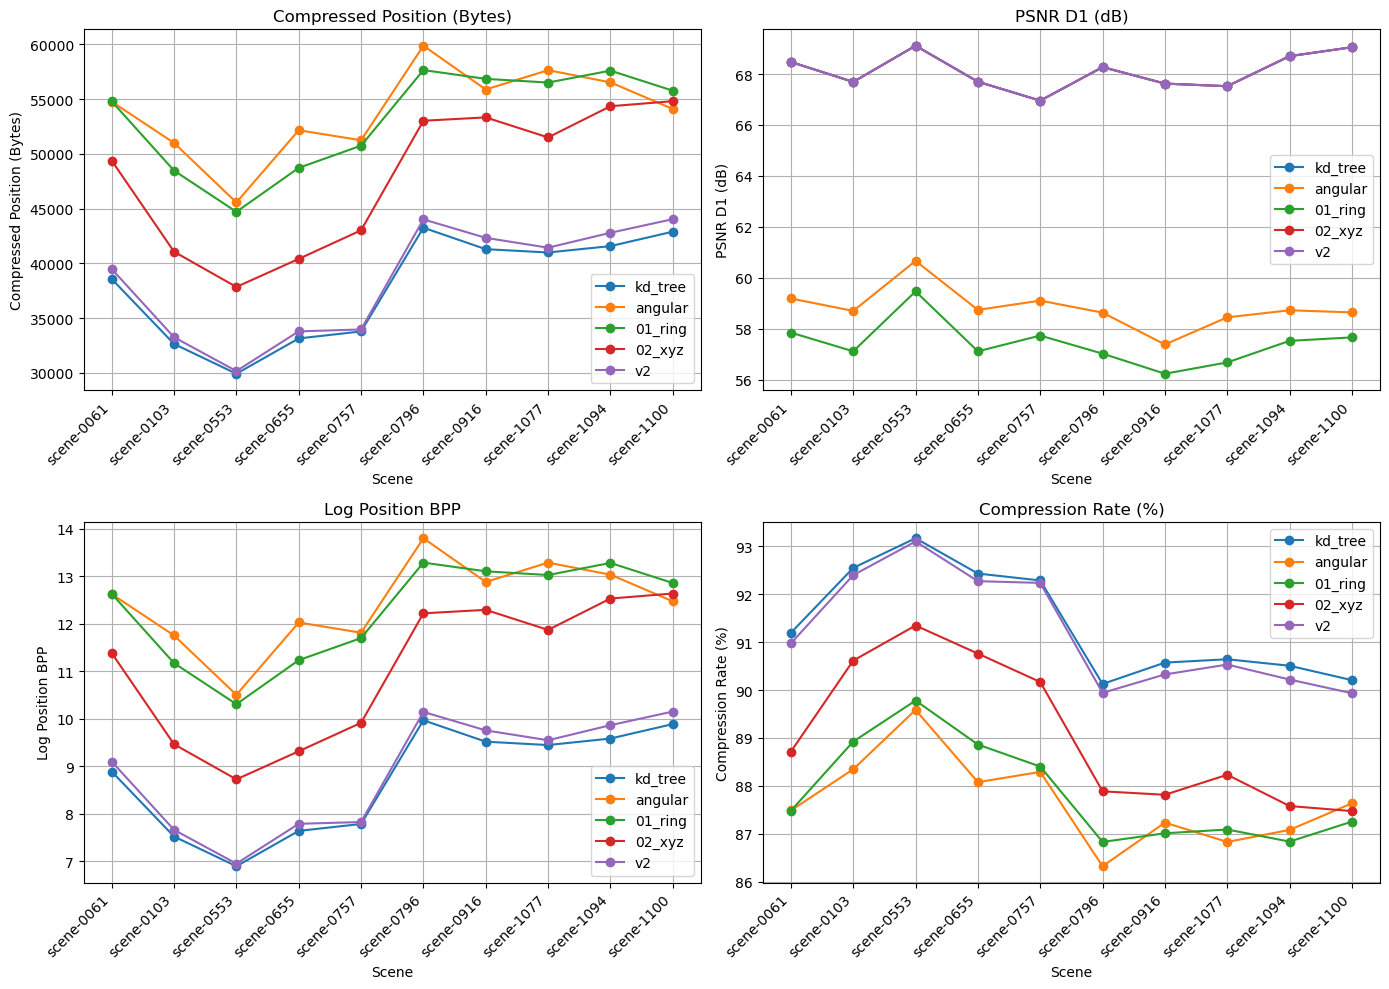

In [3]:
# Create figure with 2x2 subplots
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Metrics to plot
metrics = [
    ('compressed_pos_bytes', 'Compressed Position (Bytes)'),
    ('psnr_d1', 'PSNR D1 (dB)'),
    ('log_pos_bpp', 'Log Position BPP'),
    ('compression_rate', 'Compression Rate (%)')
]

# Get common scenes
all_scenes = set(list(df_dict.values())[0]['scene'])
for df in df_dict.values():
    all_scenes = all_scenes.intersection(set(df['scene']))
scenes = sorted(list(all_scenes))

# Create each subplot
for ax, (col, title) in zip(axes.flatten(), metrics):
    for version_name, df in df_dict.items():
        df_filtered = df[df['scene'].isin(scenes)].sort_values('scene')
        ax.plot(scenes, df_filtered[col], marker='o', label=version_name)
    
    ax.set_xlabel('Scene')
    ax.set_ylabel(title)
    ax.set_title(title)
    ax.set_xticklabels(scenes, rotation=45, ha='right')
    ax.legend()
    ax.grid(True)

plt.tight_layout()
plt.savefig(CSV_DIR / f'performance_comparison_{config_label}.png', dpi=150)
plt.show()

In [4]:
# Create summary table comparing versions
summary_data = []
for version_name, df in df_dict.items():
    summary_data.append({
        'Version': version_name,
        'Avg Compressed Pos (KB)': round(df['compressed_pos_bytes'].mean() / 1000, 2),
        'Avg PSNR D1 (dB)': round(df['psnr_d1'].mean(), 2),
        'Avg Log Pos BPP': round(df['log_pos_bpp'].mean(), 2),
        'Avg Compression Rate (%)': round(df['compression_rate'].mean(), 2)
    })

df_summary = pd.DataFrame(summary_data)  # Changed from 'summary' to 'df_summary'
df_summary = df_summary.sort_values('Avg Compression Rate (%)', ascending=False)
df_summary

,Version,Avg Compressed Pos (KB),Avg PSNR D1 (dB),Avg Log Pos BPP,Avg Compression Rate (%)
0,kd_tree,37.80,68.11,8.71,91.37
4,v2,38.52,68.11,8.88,91.19
2,01_ring,53.19,57.44,12.26,87.85
3,02_xyz,53.19,57.44,12.26,87.85
1,angular,53.88,58.82,12.42,87.69
